In [5]:

# Loads required libraries for data processing, visualization, and
# regression modeling.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Reads the housing dataset into a Pandas DataFrame.

df = pd.read_csv('housing_price_dataset.csv')

# Displays sample records to understand the dataset structure.
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [12]:
# Checks data types and overall dataset integrity.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [44]:
# Provides basic statistical insights for numerical features.

df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [13]:
# Identifies missing values that may affect model performance.

df.isnull().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [14]:
# Converts neighborhood categories into numerical variables.

df = pd.get_dummies(df, columns=['Neighborhood'],drop_first=True)

In [17]:
# Separates input features and the target price variable.

X = df.drop('Price', axis=1)
Y = df['Price']

In [18]:
# Splits the dataset to evaluate model performance on unseen data.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
# Fits a linear regression model to the training data.

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [20]:
# Predicts house prices for the test dataset.

Y_Prediction = model.predict(X_test)

In [21]:
# Measures model accuracy using regression metrics.

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_Prediction)
r2 = r2_score(Y_test, Y_Prediction)
mse, r2

(2436249371.3072467, 0.5755628630306235)

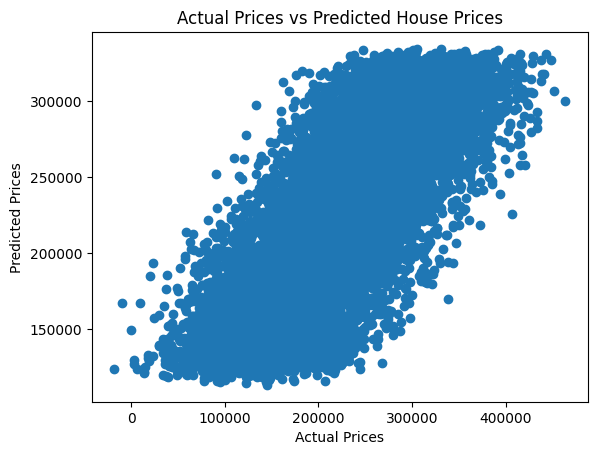

In [22]:
# Visualizes how closely predicted prices match actual prices.

plt.scatter(Y_test, Y_Prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted House Prices')
plt.show()

In [27]:
Interapretion =pd.DataFrame({'Actual': Y_test, 'Predicted': Y_Prediction})
Interapretion.head()

,Actual,Predicted
33553,170835.035713,218329.490321
9427,126913.469998,135025.032932
199,246611.883092,255260.824459
12447,244250.462969,257831.411501
39489,271127.650112,277383.667052


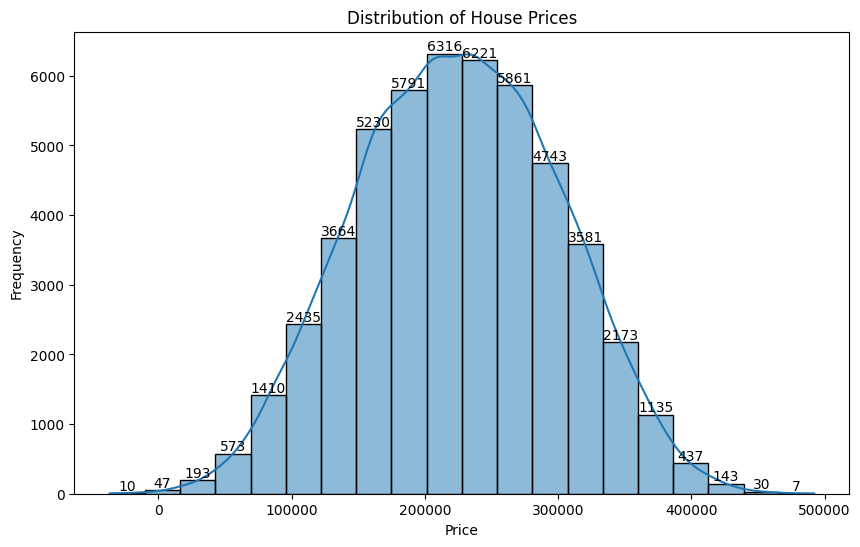

In [28]:
plt.figure(figsize=(10, 6))
Charts = sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
for container in Charts.containers:
    Charts.bar_label(container)
plt.show()

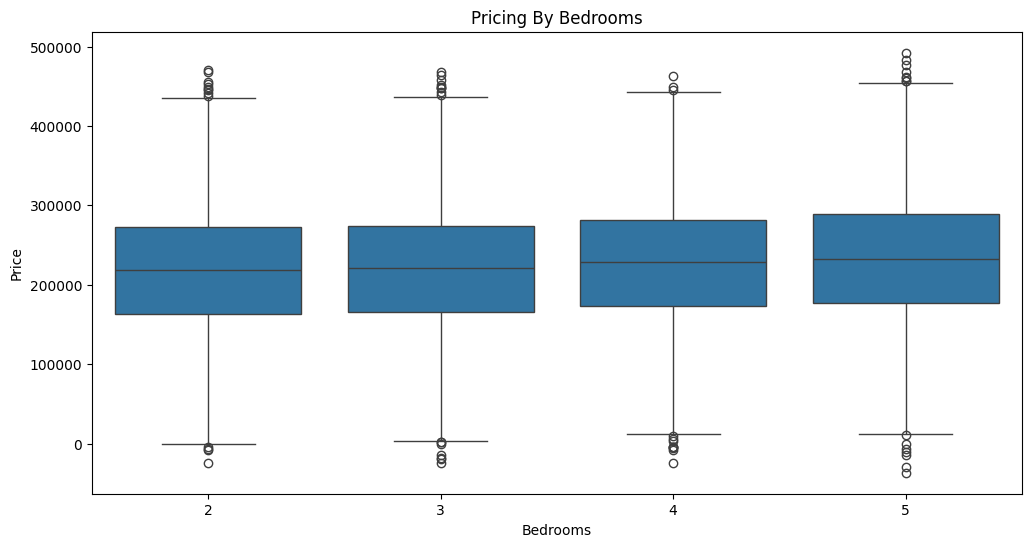

In [42]:
plt.figure(figsize=(12, 6))
Charts = sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Pricing By Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

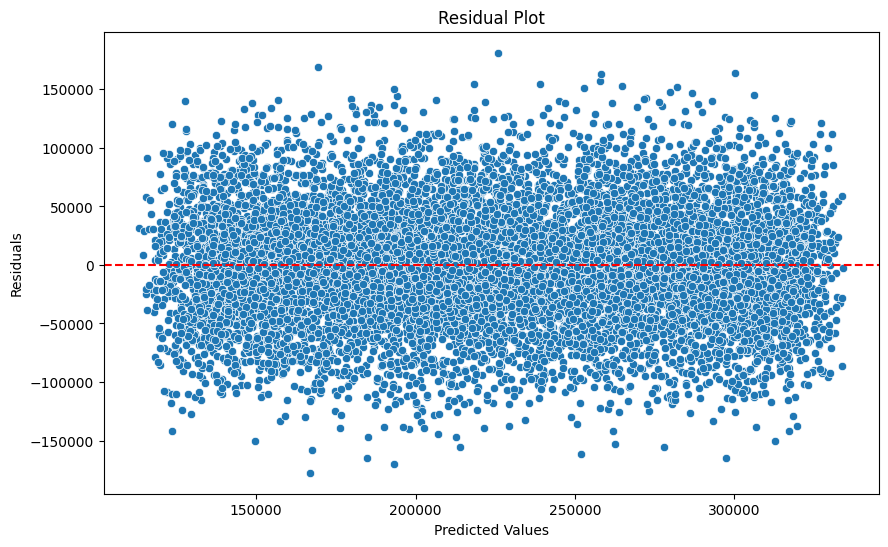

In [43]:
# Examines prediction errors to validate regression assumptions.

Residuals = Y_test - Y_Prediction
plt.figure(figsize=(10, 6))
Charts = sns.scatterplot(x=Y_Prediction, y=Residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Final Conclusion

The linear regression model effectively predicted house prices using key features such as area, number of rooms, and neighborhood. The model showed a reasonable fit, with predictions closely aligned to actual values and residuals randomly distributed around zero. Overall, the results indicate that the model captures the main factors influencing housing prices.